In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv(r"C:\Users\mithr\OneDrive\Desktop\supermarket.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [4]:
df2=df.dropna()

In [5]:
df2.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
df2['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

Text(0.5, 1.0, 'COUNT VS GENDER')

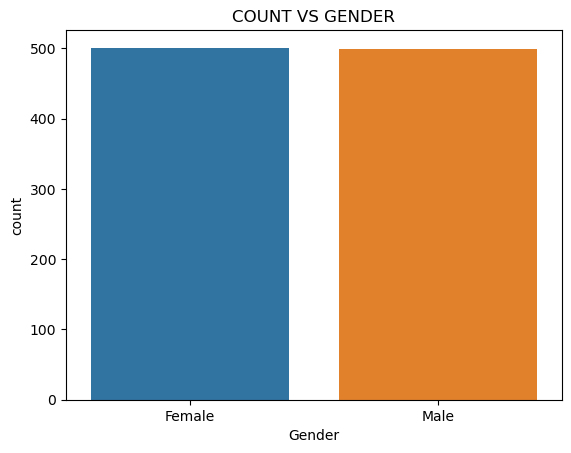

In [7]:
sns.countplot(x=df2['Gender'])
plt.title("COUNT VS GENDER")

It's more likely popular among both males and females.

Text(0.5, 1.0, 'Gross income vs Product line')

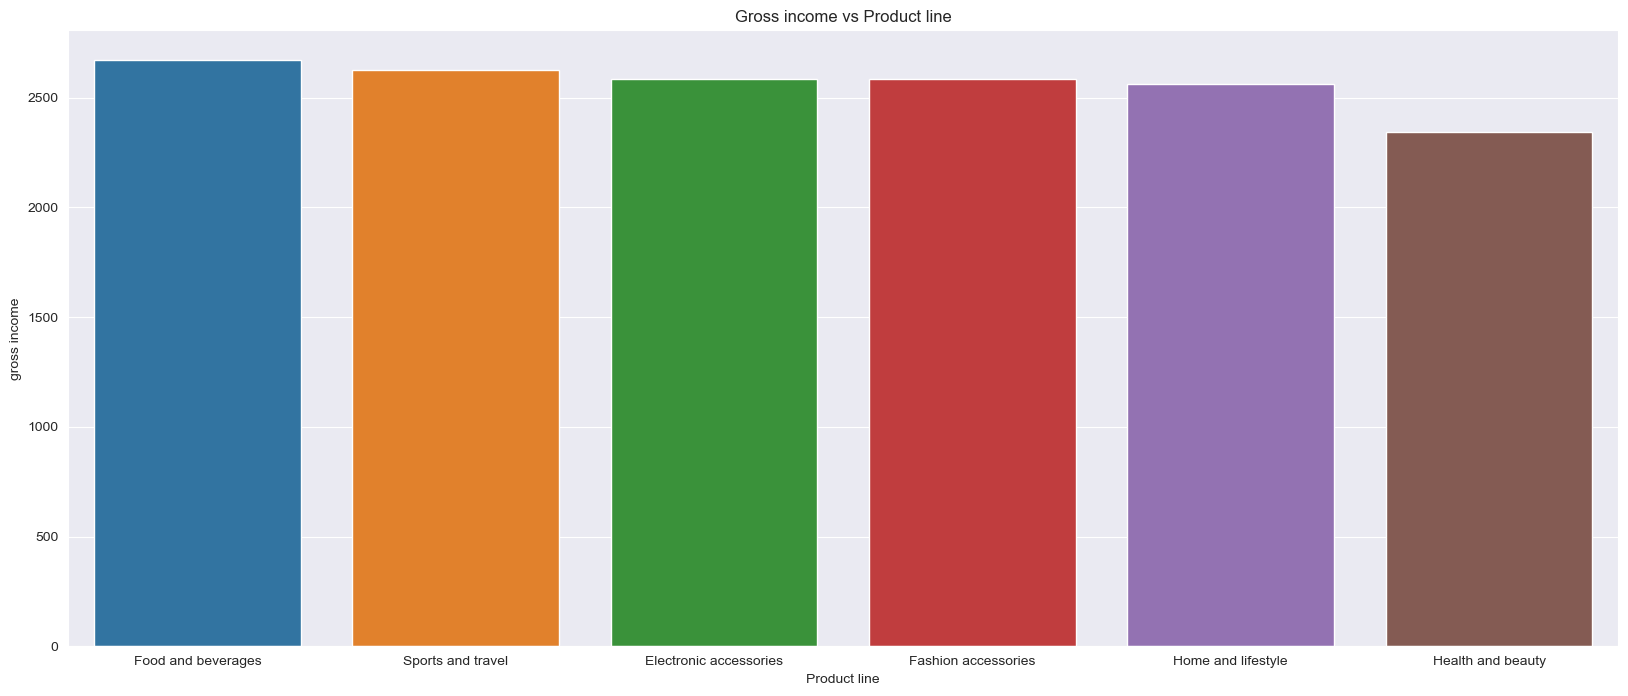

In [31]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income',
                                                                                                     ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)
plt.title("Gross income vs Product line")

C:\Users\mithr\AppData\Local\Temp\ipykernel_23120\1218256736.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Rating)


<Axes: xlabel='Rating', ylabel='Density'>

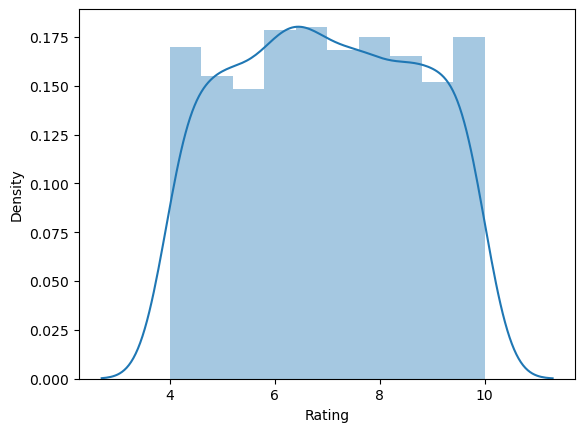

In [8]:
sns.distplot(df2.Rating)


The skewnes observed is "right skewness"

In [9]:
df2.groupby('Branch').sum()

,Invoice ID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,,,,,,,,,
A,750-67-8428631-41-3108123-19-1176373-73-791035...,YangonYangonYangonYangonYangonYangonYangonYang...,MemberNormalMemberNormalMemberMemberNormalNorm...,FemaleMaleMaleMaleFemaleFemaleFemaleMaleFemale...,Health and beautyHome and lifestyleHealth and ...,18625.49,1859,5057.1605,106200.3705,1/5/20193/3/20191/27/20192/8/20192/25/20191/10...,13:0813:2320:3310:3714:3617:1510:2516:4819:211...,EwalletCredit cardEwalletEwalletEwalletCredit ...,101143.21,1619.047619,5057.1605,2389.2
B,692-92-5582351-62-0822529-56-3974299-46-180531...,MandalayMandalayMandalayMandalayMandalayMandal...,MemberMemberMemberMemberNormalNormalNormalNorm...,FemaleFemaleMaleFemaleFemaleMaleMaleMaleFemale...,Food and beveragesFashion accessoriesElectroni...,18478.88,1820,5057.0320,106197.6720,2/20/20192/6/20193/9/20191/15/20193/11/20193/5...,13:2718:0717:0316:1915:3010:4012:2015:3119:481...,Credit cardEwalletCashCashEwalletEwalletCredit...,101140.64,1580.952381,5057.0320,2263.6
C,226-31-3081699-14-3026315-22-5665300-71-460518...,NaypyitawNaypyitawNaypyitawNaypyitawNaypyitawN...,NormalNormalNormalMemberMemberMemberNormalMemb...,FemaleMaleFemaleMaleFemaleFemaleFemaleMaleFema...,Electronic accessoriesElectronic accessoriesHo...,18567.76,1831,5265.1765,110568.7065,3/8/20193/25/20192/24/20192/25/20192/6/20191/7...,10:2918:3011:3811:2410:4212:2813:2410:1120:391...,CashEwalletEwalletEwalletEwalletEwalletEwallet...,105303.53,1561.904762,5265.1765,2319.9


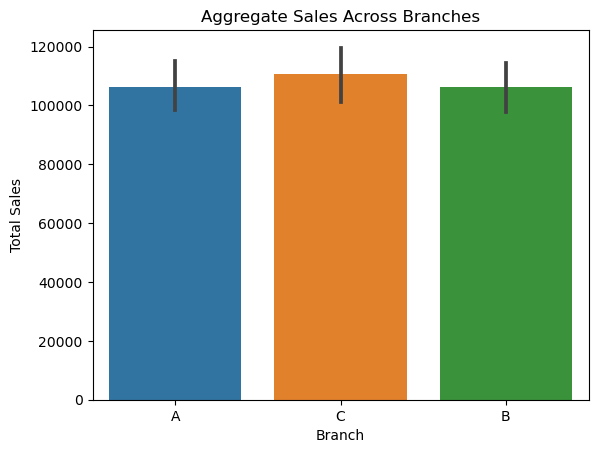

In [10]:


sns.barplot(x=df2['Branch'], y=df2['Total'],estimator=sum)

plt.title('Aggregate Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

It visualize the total sales for each branch

In [11]:
df2["Payment"].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

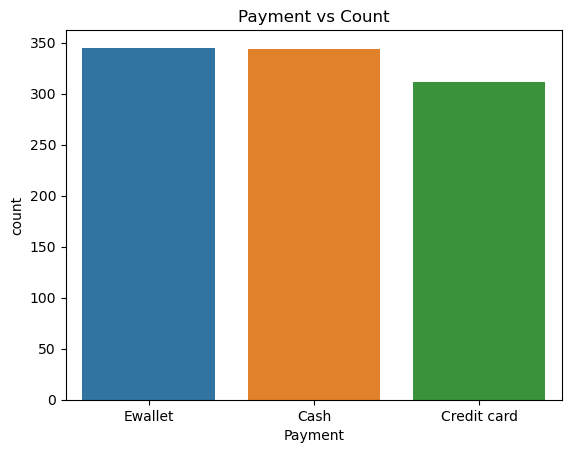

In [12]:
sns.countplot(x=df['Payment'])
plt.title("Payment vs Count")
plt.xlabel("Payment")
plt.ylabel("count")
plt.show()

E wallet is the most popular payment method

In [13]:
payment_method_distribution= df.groupby(['Branch','Payment']).size().unstack()
print(payment_method_distribution)

Payment  Cash  Credit card  Ewallet
Branch                             
A         110          104      126
B         110          109      113
C         124           98      106


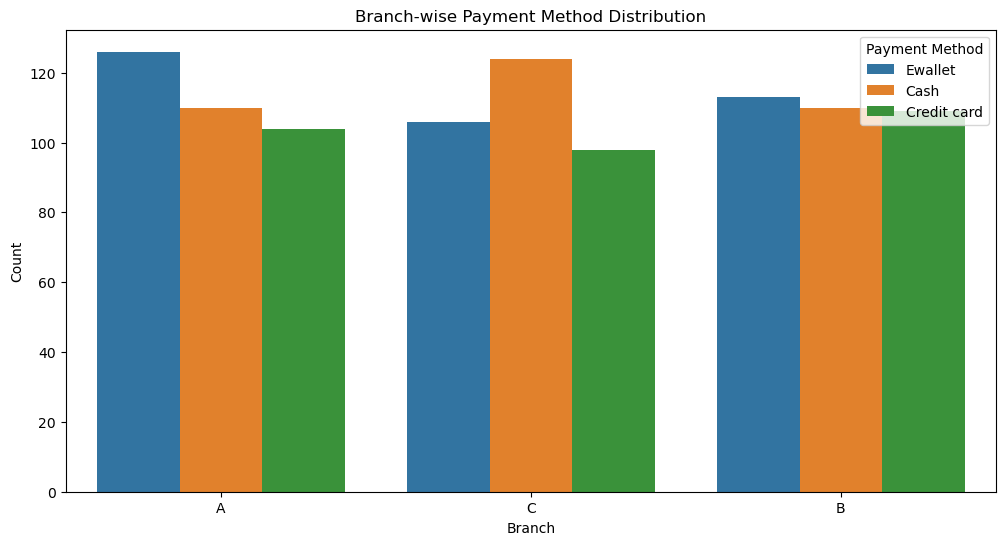

In [14]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Branch', hue='Payment', data=df2)

plt.title('Branch-wise Payment Method Distribution')
plt.xlabel('Branch')
plt.ylabel('Count')
plt.legend(title='Payment Method', loc='upper right')
plt.show()


Text(0.5, 1.0, 'Gross Income vs Rating')

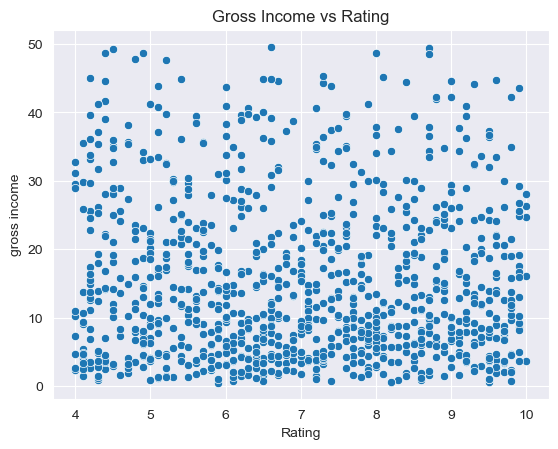

In [15]:
sns.set_style('darkgrid')
sns.scatterplot(x=df['Rating'],y=df['gross income'])
plt.title("Gross Income vs Rating")

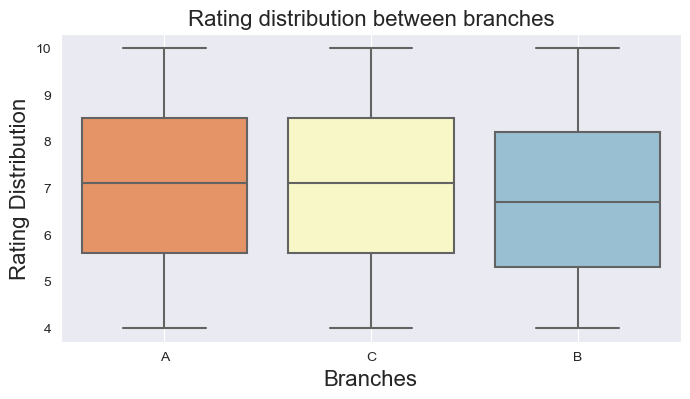

In [16]:
plt.figure(figsize=(8,4))
ax=sns.boxplot(x="Branch",y="Rating",data=df, palette="RdYlBu")
ax.set_title("Rating distribution between branches",fontsize=16)
ax.set_xlabel(xlabel= "Branches",fontsize=16)
ax.set_ylabel(ylabel= "Rating Distribution",fontsize=16)
plt.grid()

Text(0.5, 1.0, 'Gross income vs Branch')

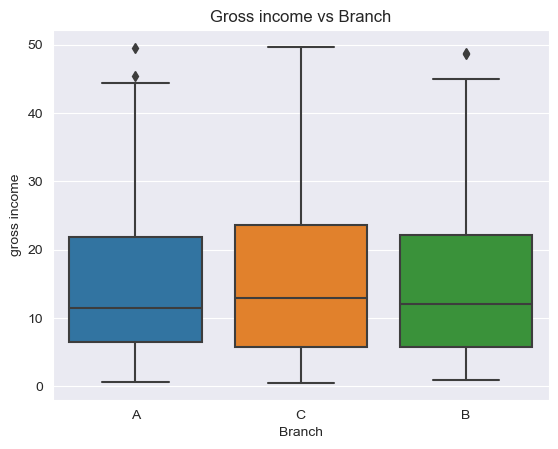

In [17]:
sns.boxplot(x=df['Branch'],y=df['gross income'])
plt.title("Gross income vs Branch")

Text(0.5, 1.0, 'Gross Income vs Gender')

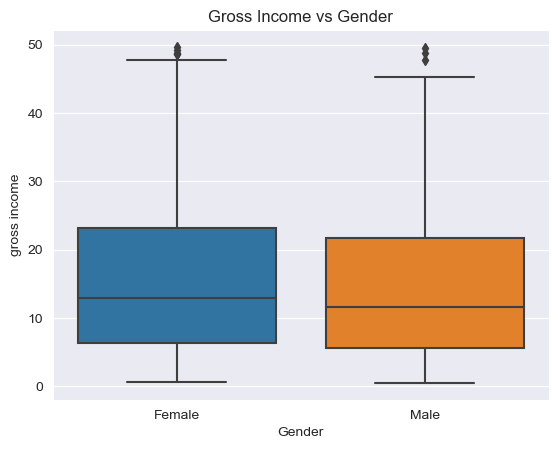

In [18]:
sns.boxplot(x=df['Gender'],y=df['gross income'])
plt.title("Gross Income vs Gender")

In [19]:
df.groupby(df.index).mean(numeric_only=True)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7.0,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5.0,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7.0,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8.0,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7.0,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1.0,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10.0,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1.0,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1.0,3.2910,69.1110,65.82,4.761905,3.2910,4.1


<Axes: title={'center': 'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

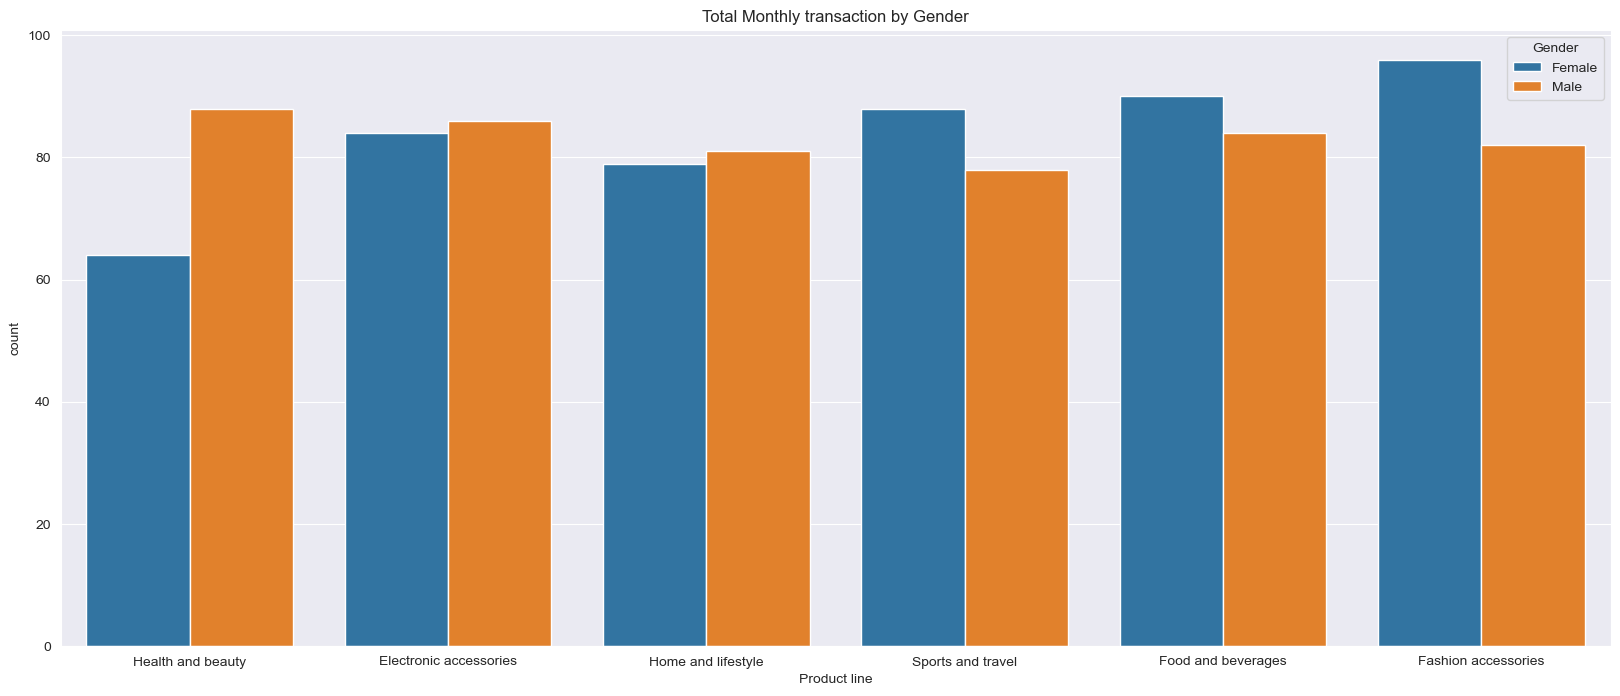

In [20]:
plt.figure(figsize=(20,8))
plt.title("Total Monthly transaction by Gender")
sns.countplot(x=df['Product line'],hue=df.Gender)

<Axes: ylabel='gross income'>

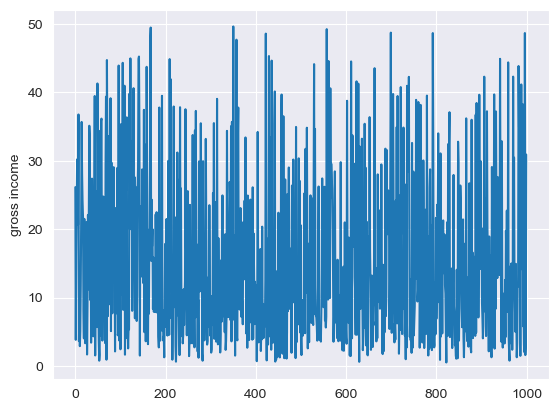

In [21]:
sns.lineplot(x=df.groupby(df.index).mean(numeric_only=True).index,y=df.groupby(df.index).mean(numeric_only=True)['gross income'])

C:\Users\mithr\AppData\Local\Temp\ipykernel_23120\1337115277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Quantity'])


<Axes: ylabel='Density'>

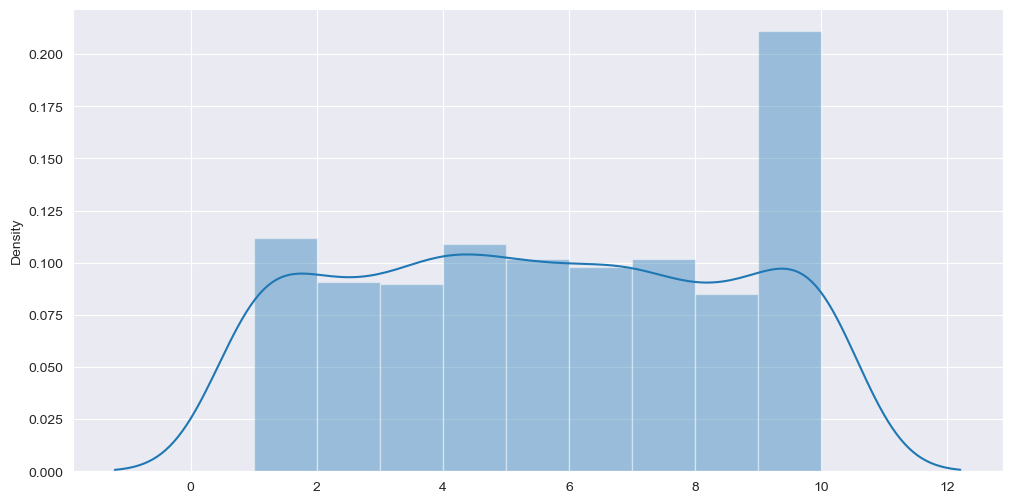

In [22]:
xdata=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(x=df['Quantity'])

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['weekday']=df['Date'].dt.day_name()



In [25]:
df.set_index('Date',inplace=True)

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


ValueError: could not convert string to float: 'Saturday'

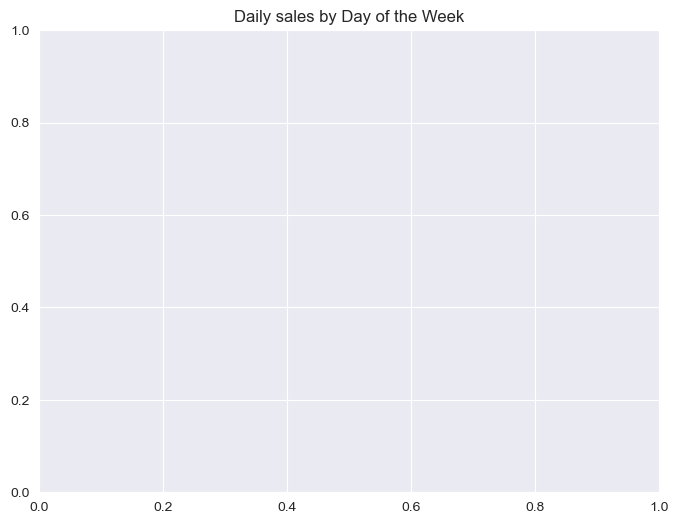

In [27]:
plt.figure(figsize=(8,6))
plt.title('Daily sales by Day of the Week')
sns.countplot(df['weekday'])

<Axes: xlabel='Date', ylabel='gross income'>

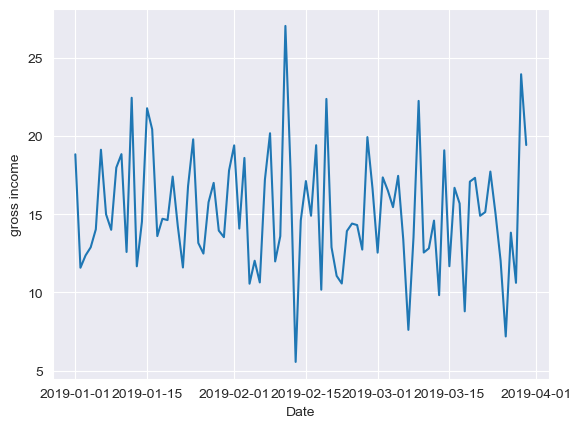

In [28]:
sns.lineplot(x=df.groupby(df.index).mean(numeric_only=True).index,y=df.groupby(df.index).mean(numeric_only=True)['gross income'])

Text(0.5, 1.0, 'Gross income vs Product line')

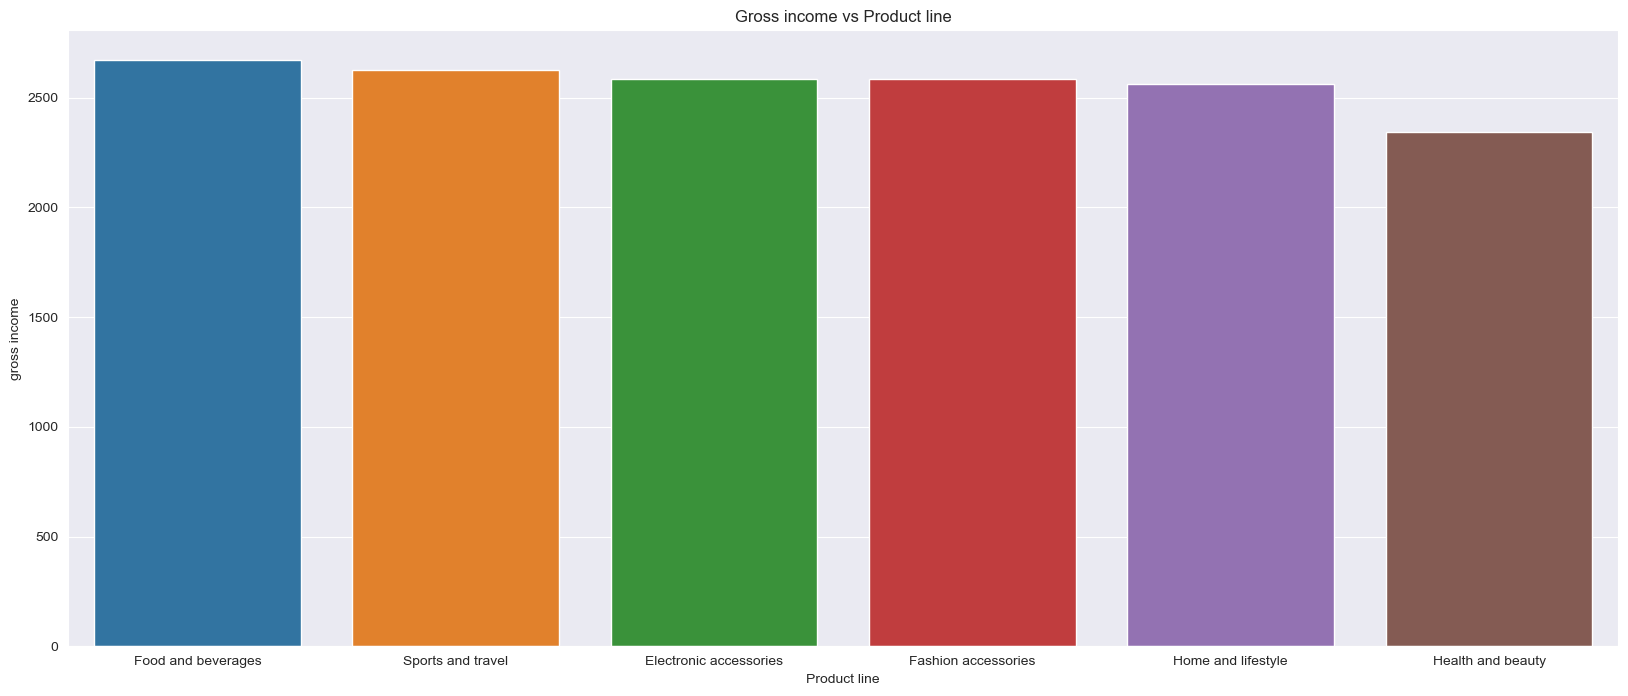

In [32]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income',
                                                                                                     ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)
plt.title("Gross income vs Product line")

C:\Users\mithr\AppData\Local\Temp\ipykernel_23120\1337115277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Quantity'])


<Axes: ylabel='Density'>

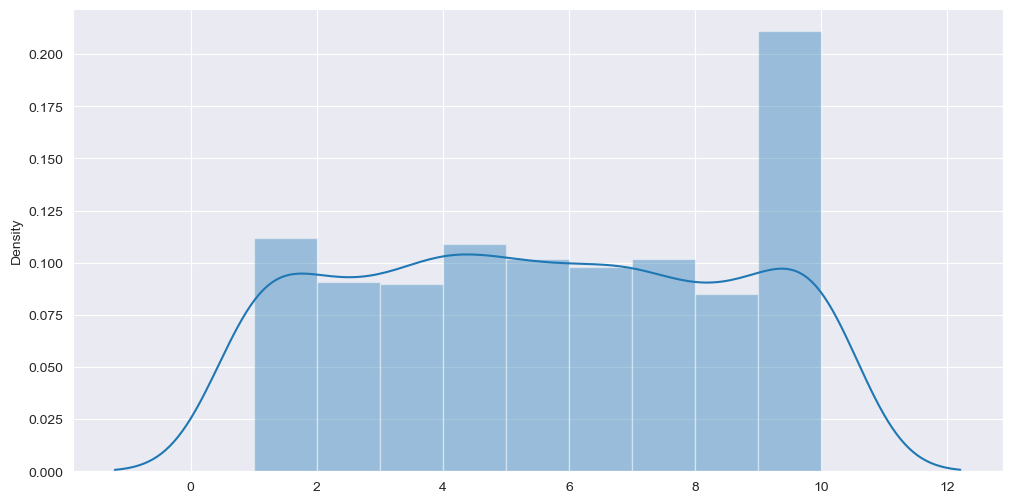

In [33]:
xdata=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(x=df['Quantity'])

<Axes: title={'center': 'Daily Sales by Day of the Week'}, xlabel='weekday', ylabel='count'>

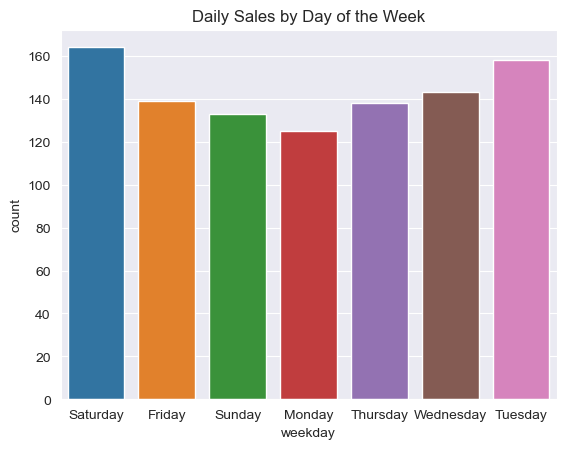

In [34]:
plt.title("Daily Sales by Day of the Week")
sns.countplot(x=df['weekday'])

In [35]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=(df['Time']).dt.hour
df['Hour'].unique()

C:\Users\mithr\AppData\Local\Temp\ipykernel_23120\2368227794.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time']=pd.to_datetime(df['Time'])


array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

Text(0.5, 1.0, 'Product Sales per Hour')

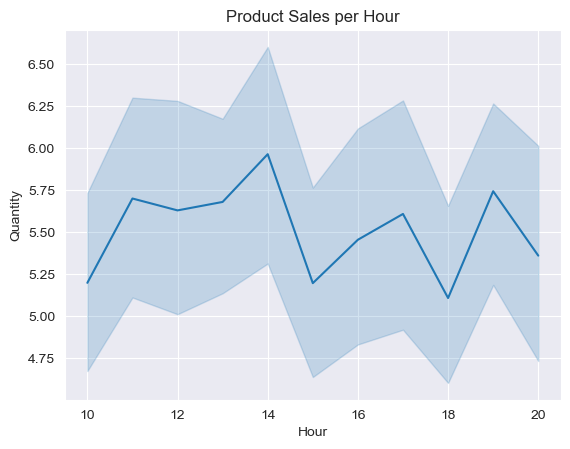

In [36]:
sns.lineplot(x="Hour",y='Quantity',data=df).set_title("Product Sales per Hour")

<Axes: xlabel='Rating', ylabel='Product line'>

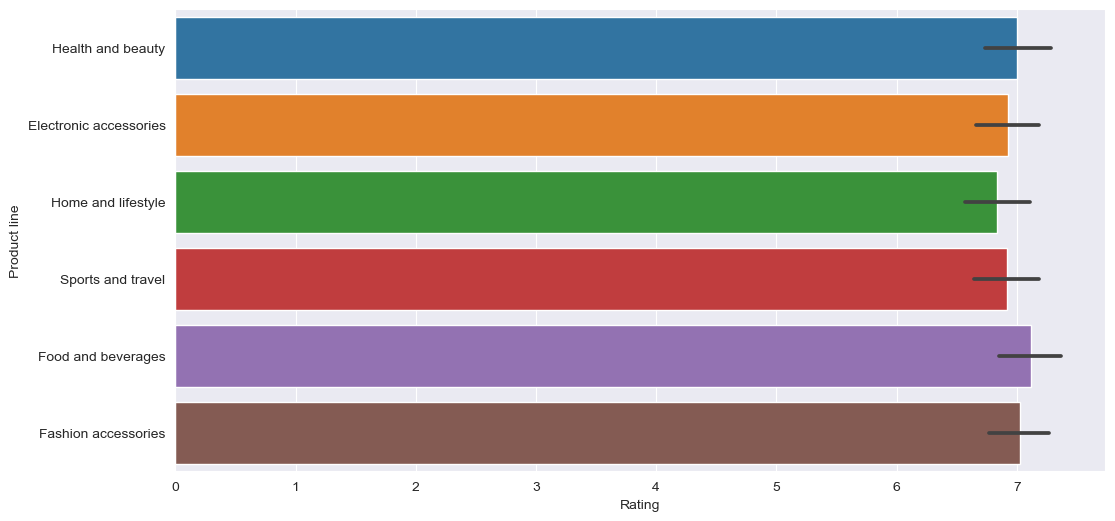

In [37]:
xdata=[0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.barplot(y=df['Product line'],x=df['Rating'])

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0'),
  Text(0, 12.5, '12.5'),
  Text(0, 15.0, '15.0'),
  Text(0, 17.5, '17.5'),
  Text(0, 20.0, '20.0')])

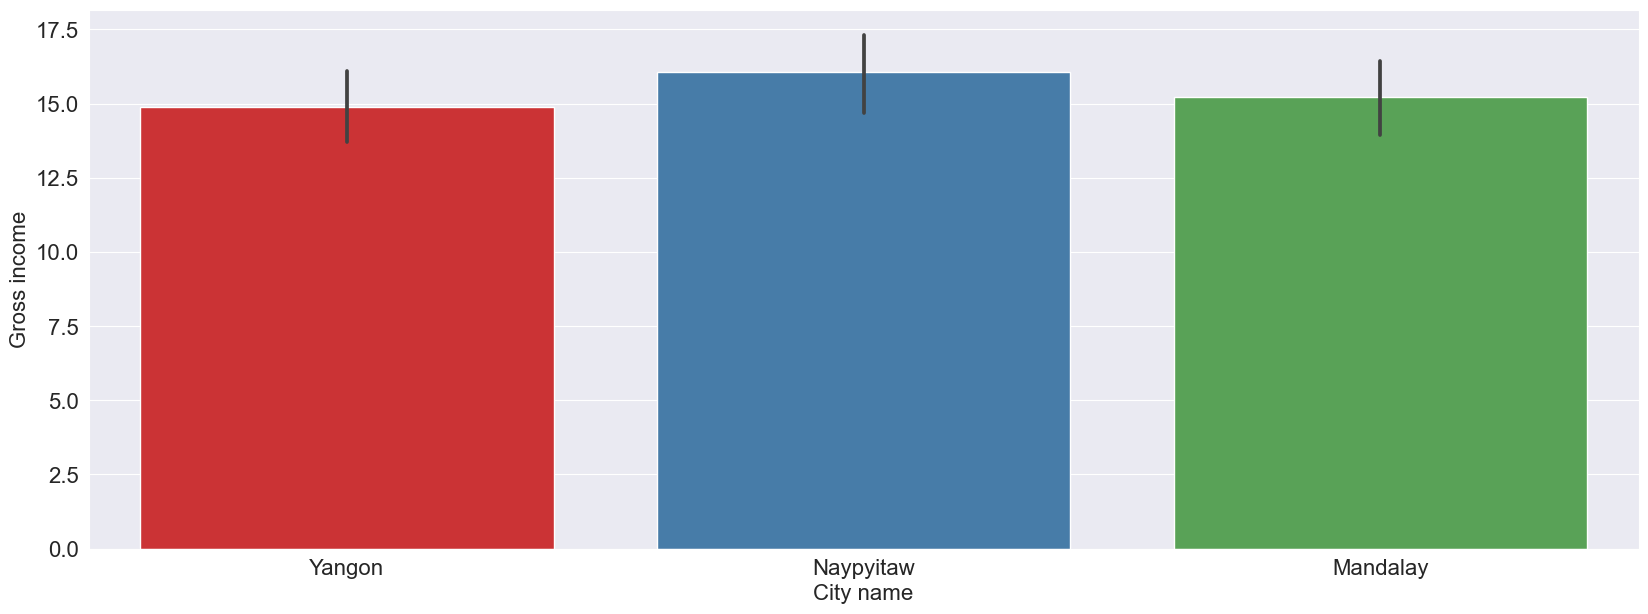

In [39]:
plt.figure(figsize=(20,7))
sns.barplot(x=df['City'],y=df['gross income'],palette='Set1')
plt.xlabel('City name',fontsize='16')
plt.xticks(fontsize='16')
plt.ylabel('Gross income',fontsize='16')
plt.yticks(fontsize='16')